<a href="https://colab.research.google.com/github/LautaroAguila/ProyectoCancelacionHoteles/blob/main/CUADERNO_DE_PRUEBAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ¿Como podemos anticipar la cancelacion de una reserva en hoteles?



#Introduccion

En esta notebook, analizaremos un conjunto de datos con el objetivo de predecir si una reserva de hotel se cancela o no.
Utilizaremos técnicas de análisis exploratorio de datos (EDA), preprocesamiento, reducción de dimensionalidad y modelado.


**Contexto empresarial.** Los hoteles de las grandes cadenas tienen reservaciones toodos los dias, pero tambien tienen cancelaciones. Y quieren saber si pueden identificar los perfiles de las reservaciones que se cancelan, cualquiera sea la razon.
En este nuevo proyecto, donde se recopilaron muchos datos de hoteles, mediante visualizaciones que ayuden a identificar patrones, vamos a intentar encontrar dichos perfiles.

**Algunas preguntas que nos hacemos.**

1. ¿Que se cancela mas?¿Reservas semanales o de fines de semana?
2. ¿Suelen cancelar mas las familias con niños?¿O los adultos sin hijos?
3. ¿Los tiempos de espera son un factor importante para saber si cancelaran o no?
4. ¿Cual es el mes en el que se cancelan mas reservas?
5. ¿Cancelan mas las que contratan servicios (almuerzo, desayuno o cena), o los que no contratan ningun servicio?

# Carga de datos


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
import os
drive.mount("/content/gdirve")

Drive already mounted at /content/gdirve; to attempt to forcibly remount, call drive.mount("/content/gdirve", force_remount=True).


In [ ]:
path = "/content/gdirve/MyDrive/DATA Coder/"

In [ ]:
df_1 = pd.read_csv(path +'booking.csv', encoding =('ISO-8859-1'),low_memory =False)


In [ ]:
df_2 = pd.read_csv(path +'hotel_bookings.csv', encoding =('ISO-8859-1'),low_memory =False)


# Exploracion de los datos.

### Columnas principales


**Nos enfocaremos en las siguientes columnas de df_1:**

*   number of adults
*   number of children
*   number of weekend nights
*   number of week nights
*   lead time
*   date of reservation
*   is_canceled

Renombramos y transformamos columnas para facilitar el análisis:

In [ ]:
import numpy as np

In [ ]:
# Renombrar y transformar columnas
df_1 = df_1.rename(columns={'booking status': 'is_canceled'})
df_1['is_canceled'] = df_1['is_canceled'].replace({'Not_Canceled': 0, 'Canceled': 1})

In [ ]:
# Eliminar columnas no relevantes
df_1 = df_1.drop(columns=["P-C", "P-not-C", "Booking_ID"])

In [ ]:
# Convertir 'date of reservation' a formato datetime
df_1['date of reservation'] = pd.to_datetime(df_1['date of reservation'], errors='coerce')

In [ ]:
df_1['type of meal'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [ ]:
df_1['room type'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [ ]:
df_1['market segment type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [ ]:
# Crear un diccionario de mapeo
mapeo_type_of_meal = {'Not Selected':0,'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3}
mapeo_type_room = {'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7}
mapeo_type_market = {'Offline':0,'Online': 1, 'Corporate': 2, 'Aviation': 3, 'Complementary': 4}
# Convertir los valores categóricos a numéricos
df_1['type of meal'] = df_1['type of meal'].map(mapeo_type_of_meal)
df_1['room type'] = df_1['room type'].map(mapeo_type_room)
df_1['market segment type'] = df_1['market segment type'].map(mapeo_type_market)

In [ ]:
df_1 = df_1.rename(columns={'lead time': 'lead_time'})

In [ ]:
# Verificar valores nulos
df_1.isnull().sum()

number of adults             0
number of children           0
number of weekend nights     0
number of week nights        0
type of meal                 0
car parking space            0
room type                    0
lead_time                    0
market segment type          0
repeated                     0
average price                0
special requests             0
date of reservation         37
is_canceled                  0
dtype: int64

In [ ]:
# Eliminar filas con valores nulos en 'date of reservation'
df_1 = df_1.dropna(subset=['date of reservation'])

In [ ]:
display(df_1.isnull().sum())

number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead_time                   0
market segment type         0
repeated                    0
average price               0
special requests            0
date of reservation         0
is_canceled                 0
dtype: int64

No hay ningun valor nulo para trabajar.

In [ ]:
df_1.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead_time,market segment type,repeated,average price,special requests,date of reservation,is_canceled
0,1,1,2,5,1,0,1,224,0,0,88.00,0,2015-10-02,0
1,1,0,1,3,0,0,1,5,1,0,106.68,1,2018-11-06,0
2,2,1,1,3,1,0,1,1,1,0,50.00,0,2018-02-28,1
3,1,0,0,2,1,0,1,211,1,0,100.00,1,2017-05-20,1
4,1,0,1,2,0,0,1,48,1,0,77.00,0,2018-04-11,1


# Análisis Exploratorio de Datos (EDA)

## Cantidad de cancelaciones

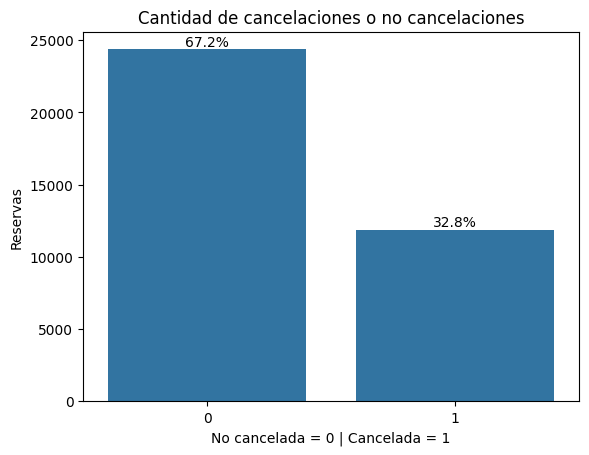

In [ ]:
# Gráfico de barra para cancelaciones
ax = sns.countplot(data=df_1, x="is_canceled")
ax.set_title("Cantidad de cancelaciones o no cancelaciones")
ax.set_ylabel("Reservas")
ax.set_xlabel("No cancelada = 0 | Cancelada = 1")

# Anotar barras con porcentajes
total = df_1['is_canceled'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
plt.show()


## Cancelaciones por mes

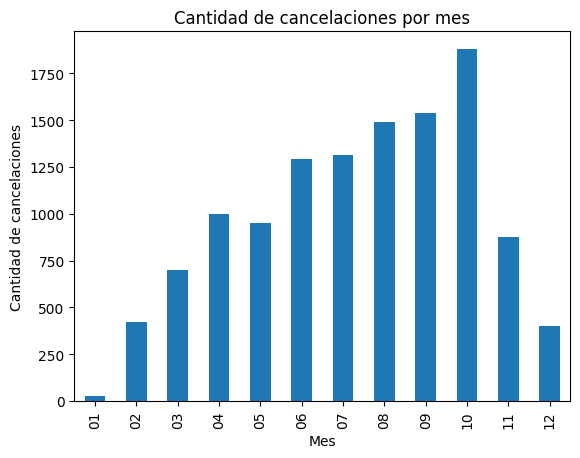

In [ ]:
df_1['mes'] = df_1['date of reservation'].dt.strftime('%m')
conteo_canceled_0_por_mes = df_1[df_1['is_canceled'] == 1].groupby('mes').size()

# Gráfico de barras para cancelaciones por mes
conteo_canceled_0_por_mes.plot(kind='bar')
plt.title('Cantidad de cancelaciones por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de cancelaciones')
plt.show()


## Cancelaciones según tiempo de espera

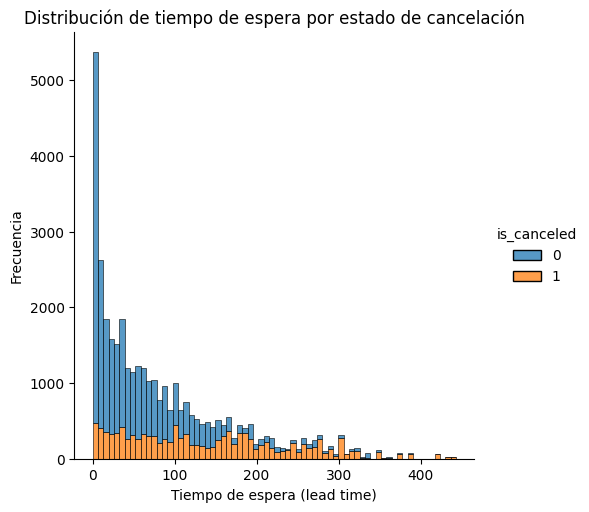

In [ ]:
sns.displot(df_1, x="lead_time", kind="hist", hue='is_canceled', multiple="stack")
plt.title("Distribución de tiempo de espera por estado de cancelación")
plt.xlabel("Tiempo de espera (lead time)")
plt.ylabel("Frecuencia")
plt.show()


## Cancelaciones según número de niños y adultos

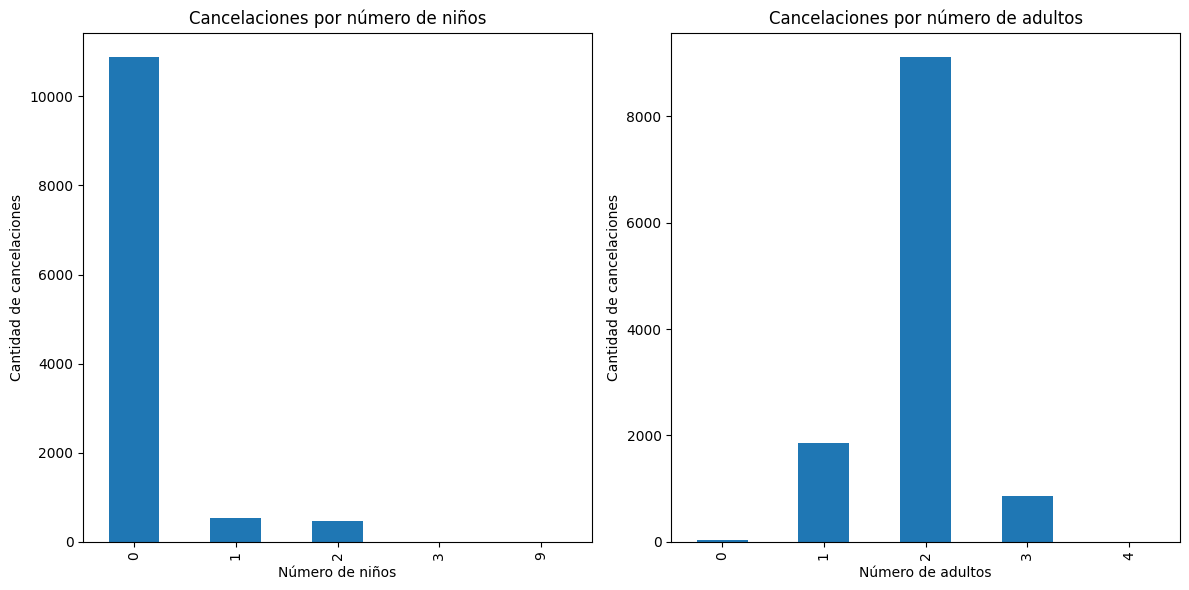

In [ ]:
# Cancelaciones por número de niños
cancelaciones_por_ninos = df_1[df_1['is_canceled'] == 1].groupby('number of children').size()

# Cancelaciones por número de adultos
cancelaciones_por_adultos = df_1[df_1['is_canceled'] == 1].groupby('number of adults').size()

# Crear gráficos
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de cancelaciones por número de niños
cancelaciones_por_ninos.plot(kind='bar', ax=axs[0])
axs[0].set_title('Cancelaciones por número de niños')
axs[0].set_xlabel('Número de niños')
axs[0].set_ylabel('Cantidad de cancelaciones')

# Gráfico de cancelaciones por número de adultos
cancelaciones_por_adultos.plot(kind='bar', ax=axs[1])
axs[1].set_title('Cancelaciones por número de adultos')
axs[1].set_xlabel('Número de adultos')
axs[1].set_ylabel('Cantidad de cancelaciones')

plt.tight_layout()
plt.show()


## Conclusión
A través de estos gráficos, podemos identificar patrones importantes como:

*   Un alto porcentaje de cancelaciones (más del 32%).
*   Octubre es el mes con más cancelaciones.
*   El tiempo de espera es un factor significativo en las cancelaciones.
*   Las cancelaciones varían según el número de adultos y niños.

Estos patrones nos ayudan a comprender mejor el comportamiento de las cancelaciones y pueden servir de base para desarrollar modelos predictivos. La próxima fase sería aplicar algoritmos de clasificación para predecir las cancelaciones en función de las características identificadas.

# Nueva sección

In [ ]:
# Preprocesamiento de Datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar características y objetivo
X = df_1.drop(columns=["is_canceled", "date of reservation"])
y = df_1['is_canceled']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Aumentar el número de componentes
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)

# Imprimir la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza acumulada explicada:", pca.explained_variance_ratio_.cumsum())


Varianza explicada por cada componente: [0.1621476  0.14136433 0.09666256 0.0853762  0.08191409]
Varianza acumulada explicada: [0.1621476  0.30351193 0.40017448 0.48555069 0.56746478]


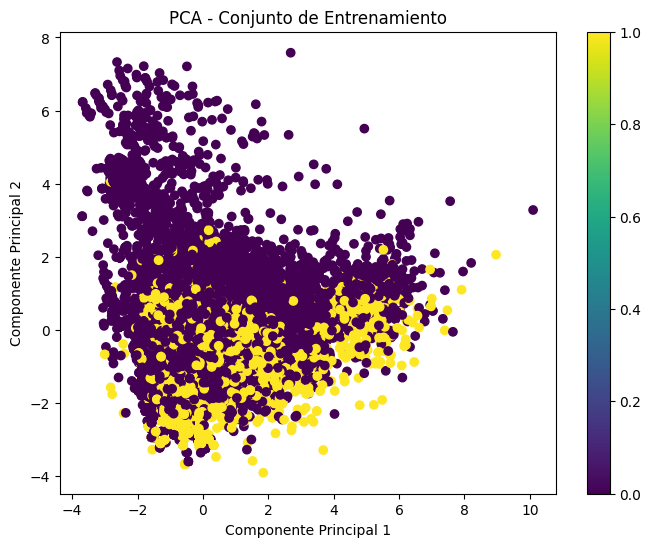

In [ ]:
# Reducción de Dimensionalidad
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA a los datos estandarizados
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# Visualización de los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Conjunto de Entrenamiento')
plt.colorbar()
plt.show()


# Comparamos los distintos algoritmos de clasificacion.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# Modelado
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Entrenamiento del modelo
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Predicción
y_pred = model.predict(X_test_pca)

# Evaluación del Modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('Exactitud es:', accuracy_score(y_test, y_pred))

[[4503  378]
 [1781  588]]
              precision    recall  f1-score   support

           0       0.72      0.92      0.81      4881
           1       0.61      0.25      0.35      2369

    accuracy                           0.70      7250
   macro avg       0.66      0.59      0.58      7250
weighted avg       0.68      0.70      0.66      7250

Exactitud es: 0.7022068965517242


En este primer algoritmo probamos con "Regresion Logistica" y nos dio que con nuestros datos obtenemos un 70% de exactitud, al comparar test y aprendizaje.

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('Exactitud es:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4881
           1       0.82      0.67      0.74      2369

    accuracy                           0.84      7250
   macro avg       0.84      0.80      0.81      7250
weighted avg       0.84      0.84      0.84      7250

[[4532  349]
 [ 788 1581]]
Exactitud es: 0.8431724137931035


En este primer algoritmo probamos con "Maquina de Vectores de Support" y nos dio que con nuestros datos obtenemos un 84% de exactitud, al comparar test y aprendizaje.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('Exactitud es:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4881
           1       0.81      0.69      0.75      2369

    accuracy                           0.85      7250
   macro avg       0.84      0.81      0.82      7250
weighted avg       0.85      0.85      0.84      7250

[[4500  381]
 [ 724 1645]]
Exactitud es: 0.8475862068965517


En este primer algoritmo probamos con "KNN" y nos dio que con nuestros datos obtenemos un 84% de exactitud, al comparar test y aprendizaje.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('Exactitud es:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4881
           1       0.79      0.80      0.80      2369

    accuracy                           0.87      7250
   macro avg       0.85      0.85      0.85      7250
weighted avg       0.87      0.87      0.87      7250

[[4384  497]
 [ 468 1901]]
Exactitud es: 0.8668965517241379


**Este ultimo algoritmo, llamado "Decision Tree's", es el que mejor se amolda a nuestros datos con un 86% de exactitud, por ende ese sera el que usaremos para nuestro modelo.**

# Algoritmo elegido: "Decision Tree's"



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)

DecisionTreeClassifier(max_depth=3)

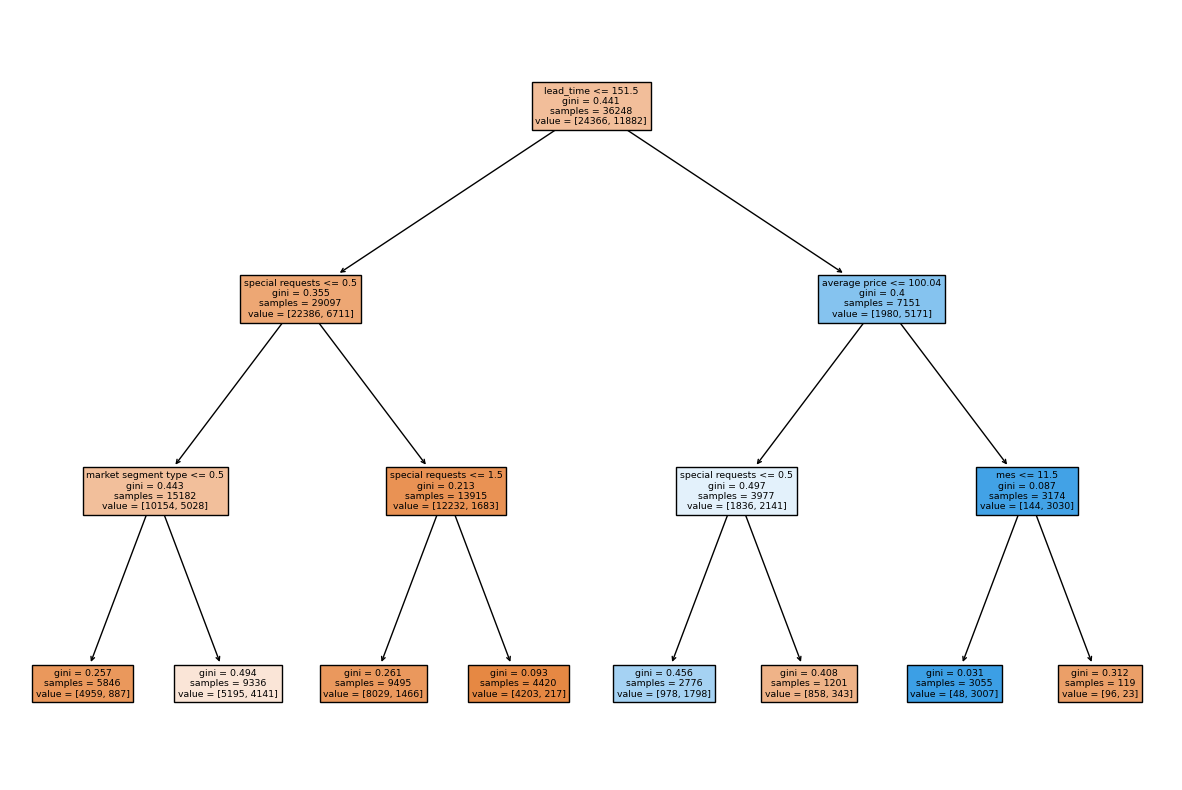

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plot_tree(model, feature_names=X.columns, filled=True);

<Axes: xlabel='lead_time', ylabel='Count'>

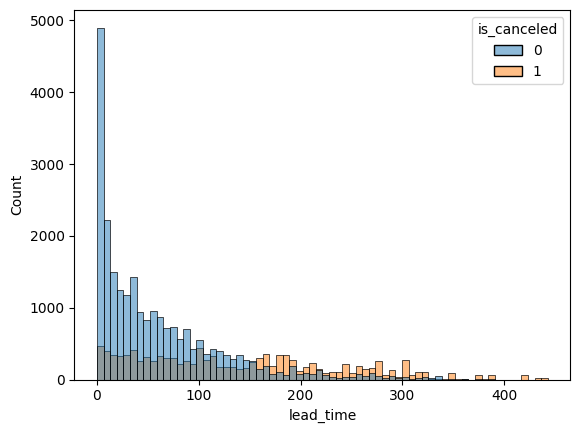

In [ ]:
sns.histplot(x=df_1.lead_time, hue=df_1.is_canceled)

In [ ]:
y_pred = model.predict(X)

In [ ]:
df_1['pred'] = y_pred
df_1.sample(10)[['is_canceled', 'pred']]

,is_canceled,pred
24728,1,0
20492,0,0
19126,0,0
33638,0,0
2216,0,0
3624,1,1
17651,0,0
33757,1,0
18874,0,0
33042,0,0


Tres de cada 10 predicciones falla.

In [ ]:
(df_1['is_canceled'] == df_1['pred']).mean()

0.7764566320900463